In [1]:
from sage.misc.prandom import randrange
from sage.matrix.berlekamp_massey import berlekamp_massey
from sage.plot.histogram import Histogram, histogram
import math, random, time
from matplotlib import pyplot as plt
import numpy as np

In [2]:
# change these primes!!!
primes = [957097, 3916067, 26918233, 999999937, 7202218937]
zetas = [randrange(2, p) for p in primes]  
Ms = [randrange(1, 10) * ((int(math.log2(p))+1)**2) for p in primes]    # O(n^2) where n is number of bits here

In [3]:
primes

[957097, 3916067, 26918233, 999999937, 7202218937]

In [4]:
zetas

[346316, 713856, 9143319, 877051883, 6777604142]

In [5]:
Ms

[3200, 2904, 2500, 7200, 1089]

In [6]:
# lc_hist 5 sets of 1000 samples LCs. Plot histograms from the same
lc_hist = []
for z,p,M in zip(zetas, primes, Ms):
    print(z,p,M)
    input_vec = np.random.randint(2,p,size=1000)
    lc_values = []
    for x in input_vec:
        y = Mod(x,p)
        S = []
        for i in range(math.ceil(M/2)*2):
            y = Mod(z,p) ** y
            S.append(y)
        lc_values.append(berlekamp_massey(S).degree())
    lc_hist.append(lc_values)

346316 957097 3200
713856 3916067 2904
9143319 26918233 2500
877051883 999999937 7200
6777604142 7202218937 1089


In [7]:
for lc in lc_hist:
    print(min(lc), max(lc))

1600 1600
82 1452
37 1250
772 3600
545 545


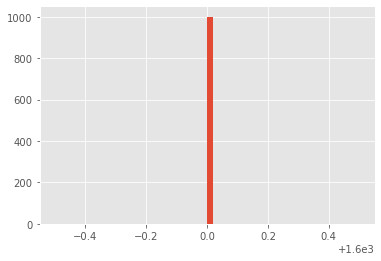

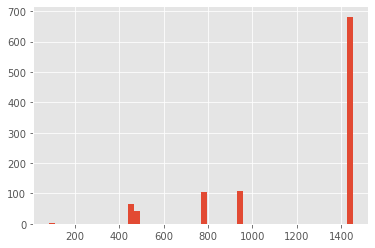

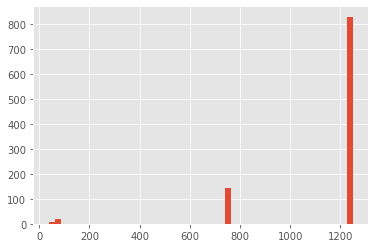

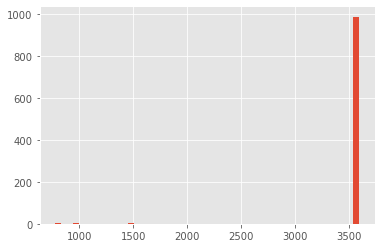

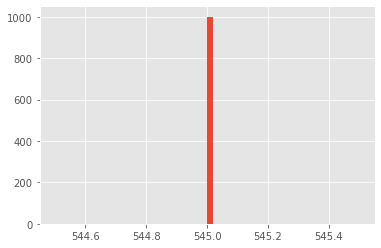

In [8]:
for lc in lc_hist:
    plt.style.use('ggplot')
    plt.hist(lc, bins=50)
    plt.show()